In [108]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [109]:
#! pip install torchvision

In [110]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # matplotlib.pyplot 사용 커널 충돌

In [111]:
mnist_train=datasets.MNIST('MNIST_data', 
                           train=True,
                           download=True,
                           transform=transforms.Compose([transforms.ToTensor]))


mnist_test=datasets.MNIST('MNIST_data', 
                           train=False,
                           download=True,
                           transform=transforms.Compose([transforms.ToTensor]))

In [112]:
print(mnist_train)
print(mnist_test)

Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data
    Split: Train
    StandardTransform
Transform: Compose(
               <class 'torchvision.transforms.transforms.ToTensor'>
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: MNIST_data
    Split: Test
    StandardTransform
Transform: Compose(
               <class 'torchvision.transforms.transforms.ToTensor'>
           )


In [113]:
def plot(x):
    img=(np.array(x.detach(), dtype='float')).reshape(28,28)
    plt.imshow(img, cmap='grey')
    plt.show()

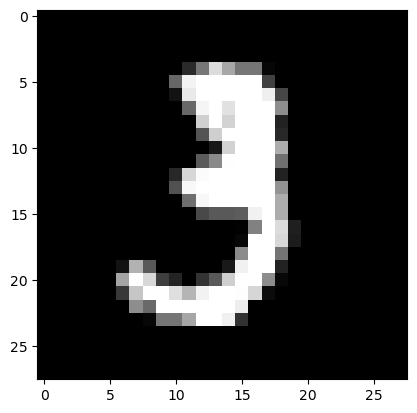

In [114]:
plot(mnist_train.data[10])

In [115]:
print(mnist_train.targets[10])
print(mnist_train.data.shape)
print(mnist_train.targets.shape)

tensor(3)
torch.Size([60000, 28, 28])
torch.Size([60000])


In [116]:
mnist_train.data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

In [117]:
x=mnist_train.data.float()/255  # 데이터 스케일 조정
# print(x[0])
y=mnist_train.targets
#y[:10]

print(x.size())
print(y.size())
x=x.view(x.size(0), -1)  # 입력데이터 모양 변경(2차원-> 1차원으로 변경)

input_size=x.size(-1)  # 입력데이터 크기
print(input_size)
output_size=int(max(y))+1 # 출력데이터 크기
print(output_size)

torch.Size([60000, 28, 28])
torch.Size([60000])
784
10


In [124]:
# 훈련데이터(train)와 검증데이터(valid)로 분리

ratio=[0.8, 0.2]
train_cnt=int(x.size(0)*ratio[0])
valid_cnt=int(x.size(0)*ratio[1])
test_cnt=len(mnist_test.data)

print(train_cnt, valid_cnt, test_cnt)
cnts=[train_cnt, valid_cnt]

indices=torch.randperm(x.size(0))
x=torch.index_select(x, dim=0, index=indices)
y=torch.index_select(y, dim=0, index=indices)
#plot(x[3])
#y[3]

x1=list(x.split(cnts, dim=0))
y1=list(y.split(cnts, dim=0))
print(x1[0].shape, x1[1].shape)
print(y1[0].shape, y1[1].shape)

x1+=[(mnist_test.data.float()/255).view(test_cnt, -1)]
y1+=[mnist_test.targets]

for ii in x1:
    print(ii.shape)

for yi in y1:
    print(yi.shape)

48000 12000 10000
torch.Size([48000, 784]) torch.Size([12000, 784])
torch.Size([48000]) torch.Size([12000])
torch.Size([48000, 784])
torch.Size([12000, 784])
torch.Size([10000, 784])
torch.Size([48000])
torch.Size([12000])
torch.Size([10000])


In [127]:
model=nn.Sequential(
    nn.Linear(input_size, 500),
    nn.LeakyReLU(),
    nn.Linear(500, 400),
    nn.LeakyReLU(),
    nn.Linear(400, 300),
    nn.LeakyReLU(),
    nn.Linear(300, 200),
    nn.LeakyReLU(),
    nn.Linear(200, 100),
    nn.LeakyReLU(),
    nn.Linear(100, 50),
    nn.LeakyReLU(),
    nn.Linear(50, output_size),
    nn.Softmax(dim=-1)
)
model

Sequential(
  (0): Linear(in_features=784, out_features=500, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=500, out_features=400, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=400, out_features=300, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=300, out_features=200, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=200, out_features=100, bias=True)
  (9): LeakyReLU(negative_slope=0.01)
  (10): Linear(in_features=100, out_features=50, bias=True)
  (11): LeakyReLU(negative_slope=0.01)
  (12): Linear(in_features=50, out_features=10, bias=True)
  (13): Softmax(dim=-1)
)

In [128]:
crit=nn.CrossEntropyLoss() #
optimizer=optim.Adam(model.parameters())

In [129]:
device=torch.device('cpu')
if torch.cuda.is_available():
    device=torch.device('cuda')

In [130]:
model=model.to(device)
x2=[x_i.to(device) for x_i in x1]
y2=[y_i.to(device) for y_i in y1]

In [131]:
epochs=1000
batch_size=256
print_interval=10

In [133]:
from copy import deepcopy
lowest_loss=np.inf  # 최소 비용값 저장
bast_model=None

early_stop=50
lowest_epoch=np.inf  # 최소 비용값을 가지는 epoch

In [134]:
y2[:10]

[tensor([0, 2, 9,  ..., 2, 9, 4]),
 tensor([8, 5, 8,  ..., 6, 3, 3]),
 tensor([7, 2, 1,  ..., 4, 5, 6])]

In [ ]:
train_history, valid_history=[],[]

for i in range(epochs):
    indices=torch.randperm(x2[0].size(0)).to(device)
    x_=torch.index_select(x2[0], dim=0, index=indices)
    y_=torch.index_select(y2[0], dim=0, index=indices)

    x_=x_.split(batch_size, dim=0)
    y_=x_.split(batch_size, dim=0)

    train_loss, valid_loss=0,0
    y_hat=[]

    for x_i, y_i in zip(x_, y_):
        y_hat_i=model(x_i)
        loss=crit(y_hat_i, y_i.squeeze())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss+=float(loss)
    
    train_loss=train_loss/len(x_) # len(x_)=4800/256

    with torch.no_grad(): #기울기 미분을 하지 않는 다는 뜻
        x_=x2[1].split(batch_size, dim=0)
        y_=y2[1].split(batch_size, dim=0)
        valid_loss=0

        for x_i, y_i in zip(x_, y_):
            y_hat_i=model(x_i)
            loss=crit(y_hat_i, y_i)
            valid_loss+=float(loss)

            y_hat+=[y_hat_i]

    valid_loss=valid_loss/len(x_i)

    train_history+=[train_loss]
    valid_history+=[valid_loss]

    if (i+1) % print_interval==0:
        print(i, train_loss, valid_loss, lowest_loss)

    if valid_loss <=lowest_loss:
        lowest_loss=valid_loss
        lowest_epoch=i

        


        




